In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Basic informations

In [260]:
df=pd.read_csv('/content/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [261]:
df.shape

(2900, 8)

In [262]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [264]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [265]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [266]:
df.corr(numeric_only=True)  # not getting the productive data as the output coloumn is in categorical data.

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.733011,-0.750760,-0.717185,-0.732649
Social_event_attendance,-0.733011,1.000000,0.747756,0.734795,0.744615
Going_outside,-0.750760,0.747756,1.000000,0.736390,0.770819
Friends_circle_size,-0.717185,0.734795,0.736390,1.000000,0.707888
Post_frequency,-0.732649,0.744615,0.770819,0.707888,1.000000


# Analysis by  data ploting

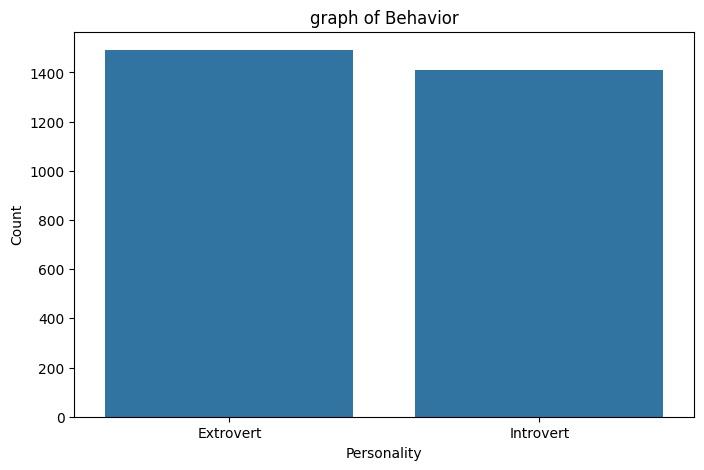

In [267]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Personality', data=df)
plt.title('graph of Behavior')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

In [268]:
# We can calculate how many Extrovert and Introverts are there:
df['Personality'].value_counts()

,count
Personality,
Extrovert,1491
Introvert,1409


In [269]:
df['Stage_fear']=df['Stage_fear'].map({
    'Yes': 1,
    'No': 0
})
df['Drained_after_socializing']=df['Drained_after_socializing'].map({
    'Yes': 1,
    'No': 0
})
df['Personality']=df['Personality'].map({
    'Introvert': 1,
    'Extrovert': 0
})
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,0
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,0
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,1
2898,11.0,1.0,1.0,NaN,1.0,2.0,0.0,1


In [270]:
df.corr()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.859387,-0.733011,-0.750760,0.860167,-0.717185,-0.732649,0.720312
Stage_fear,0.859387,1.000000,-0.860010,-0.882223,1.000000,-0.835318,-0.854477,0.865795
Social_event_attendance,-0.733011,-0.860010,1.000000,0.747756,-0.859627,0.734795,0.744615,-0.729417
Going_outside,-0.750760,-0.882223,0.747756,1.000000,-0.882207,0.736390,0.770819,-0.747794
Drained_after_socializing,0.860167,1.000000,-0.859627,-0.882207,1.000000,-0.834689,-0.852247,0.866737
Friends_circle_size,-0.717185,-0.835318,0.734795,0.736390,-0.834689,1.000000,0.707888,-0.696507
Post_frequency,-0.732649,-0.854477,0.744615,0.770819,-0.852247,0.707888,1.000000,-0.729287
Personality,0.720312,0.865795,-0.729417,-0.747794,0.866737,-0.696507,-0.729287,1.000000


Text(0, 0.5, 'Friends_circle_size')

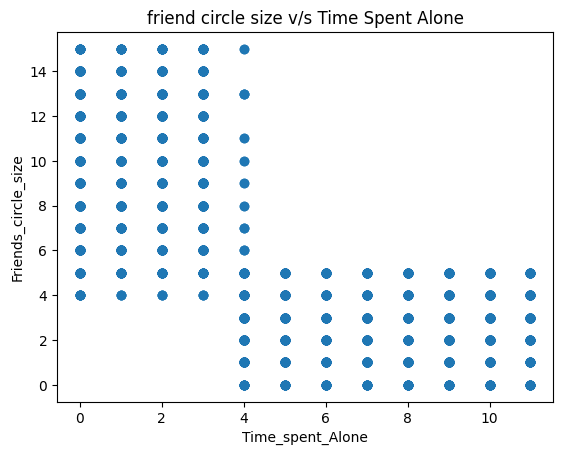

In [298]:
plt.scatter(df['Time_spent_Alone'],df['Friends_circle_size'])
plt.title('friend circle size v/s Time Spent Alone')
plt.xlabel('Time_spent_Alone')
plt.ylabel('Friends_circle_size')

<Axes: xlabel='Time_spent_Alone', ylabel='Going_outside'>

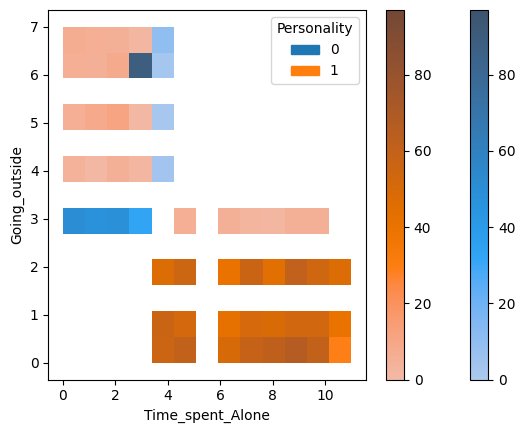

In [299]:
sns.histplot(data=df,x='Time_spent_Alone',y='Going_outside',hue='Personality',cbar=True)

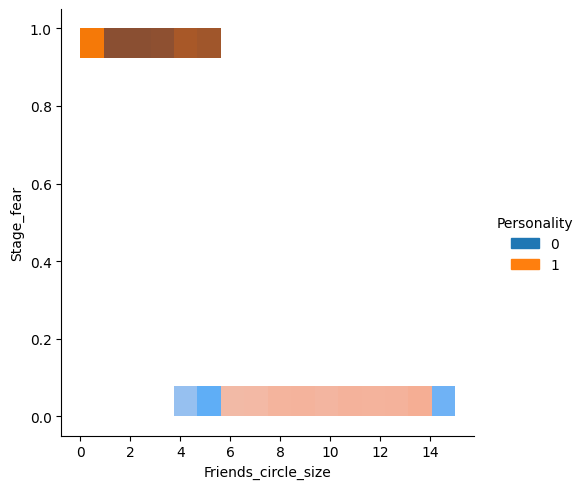

In [283]:
sns.displot(data=df,x='Friends_circle_size',y='Stage_fear',hue='Personality')

<Axes: xlabel='Stage_fear', ylabel='Social_event_attendance'>

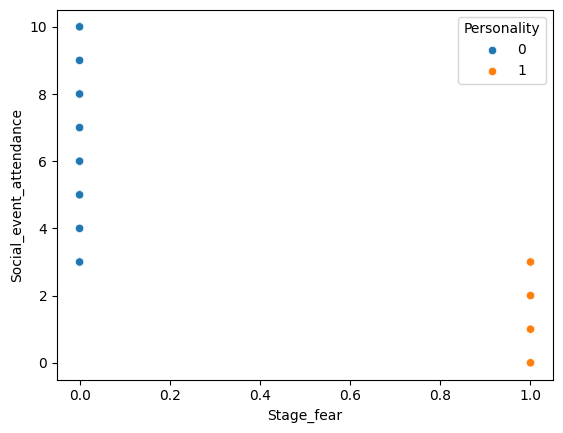

In [280]:
sns.scatterplot(data=df,x='Stage_fear',y='Social_event_attendance',hue='Personality')

Text(0.5, 1.0, 'Heatmap of personality Dataset')

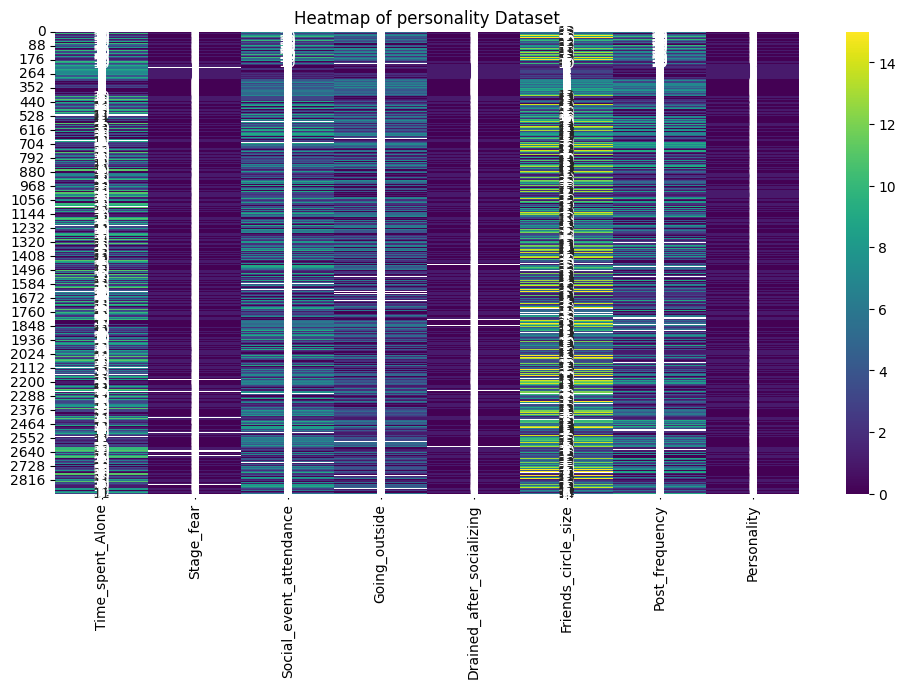

In [258]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df,annot=True,cmap='viridis')
plt.title('Heatmap of personality Dataset')

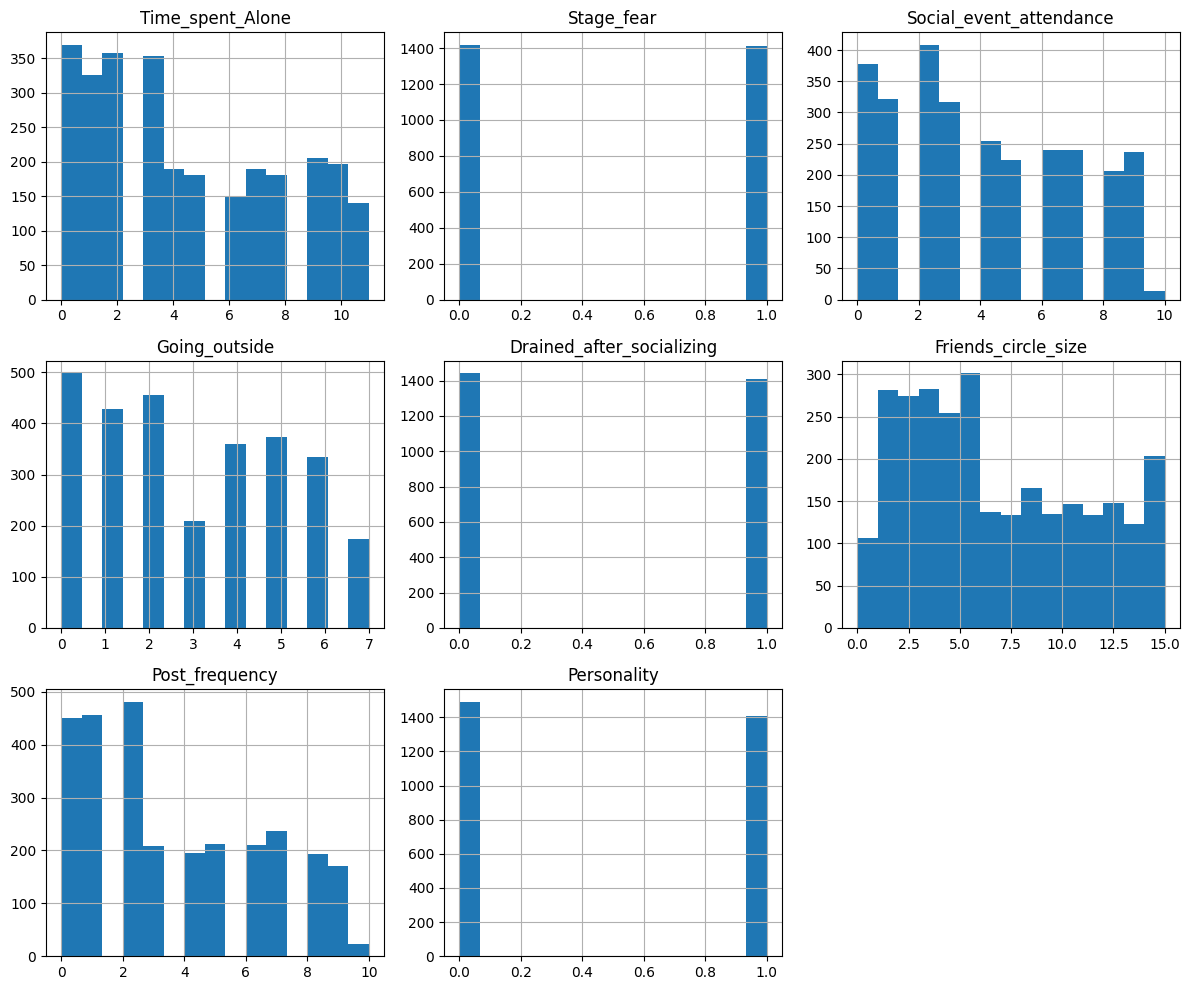

In [272]:
df.hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()

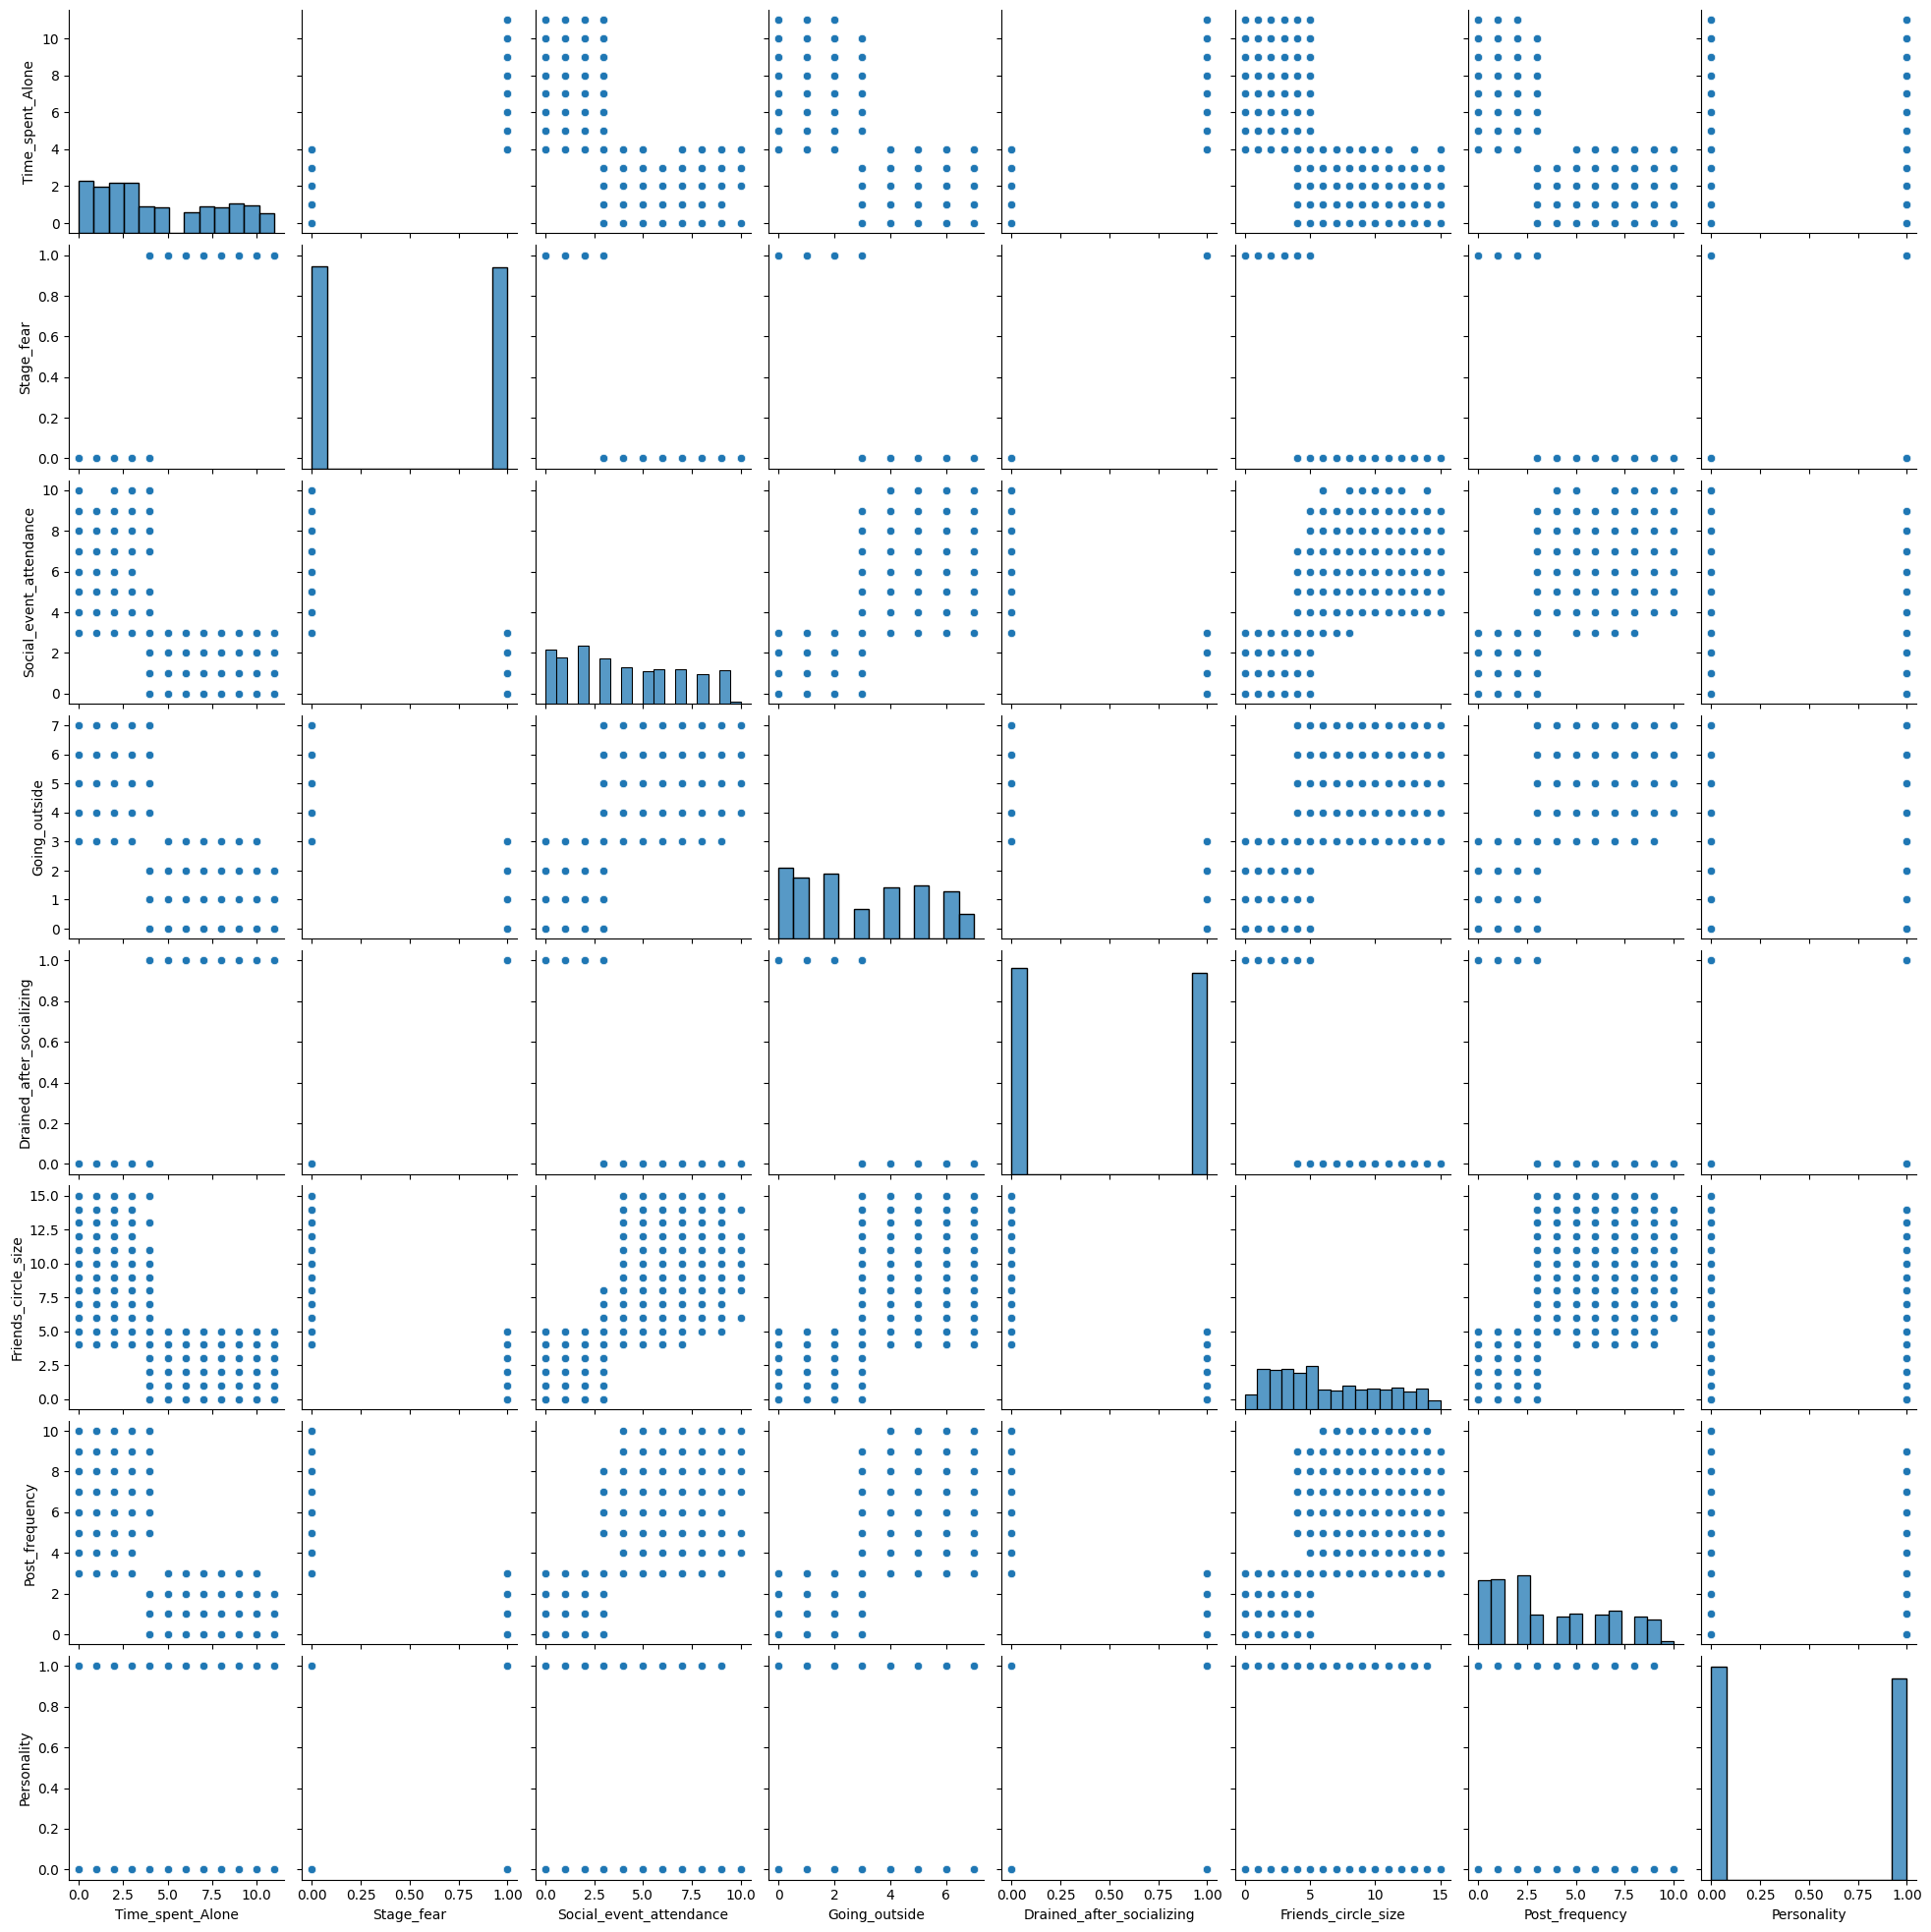

In [273]:
sns.pairplot(df)

# As we can see that the personality column behaves as the output columns to the others columns datas , so we can say that it is a supervised learning dataset. And also Some columns have the categorical data. so it is categorical supervised machine learning Problem And the Logistic regressiong Can be used as a model for this perticular datasheet